In [1]:
import glob
from obspy.core import read

In [2]:
for file in glob.glob('*.z'):
    st = read(file)
    tr = st[0]
    msg = "%s %s %f %f" %(tr.stats.station, str(tr.stats.starttime),
                          tr.data.mean(), tr.data.std())
    print(msg)

# Leer y manipular tiempos y horas

In [3]:
from obspy.core import UTCDateTime

In [4]:
UTCDateTime("2011-03-11T05:46:23.000000Z")

2011-03-11T05:46:23.000000Z

In [5]:
UTCDateTime(2012, 10, 7, 12, 15, 0)

2012-10-07T12:15:00.000000Z

In [6]:
UTCDateTime("2012-09-07T12:15:00+02:00")

2012-09-07T10:15:00.000000Z

In [7]:
UTCDateTime(1347032100.0)

2012-09-07T15:35:00.000000Z

### Acceder a Atributos

In [8]:
time = UTCDateTime("2011-03-11T05:46:23.000000Z")
time.year

2011

In [9]:
time.julday

70

In [10]:
time.timestamp

1299822383.0

In [11]:
time.weekday

4

## Manejar diferencias horarias

In [12]:
time = UTCDateTime("2011-03-11T05:46:23.000000Z")

In [13]:
print(time + 3600)

2011-03-11T06:46:23.000000Z


In [17]:
time2 = UTCDateTime(2011, 1, 1)

In [18]:
print(time2)

2011-01-01T00:00:00.000000Z


In [19]:
print(time - time2)

5982383.0


## Ejercicios de ejemplo

**Ejercicio 1**: Calcular el número de horas que pasaron desde tu nacimiento

In [23]:
birth_time = UTCDateTime(1989, 4, 10, 12, 15, 0)

In [21]:
current_time = UTCDateTime()

In [24]:
current_time

2024-02-14T00:28:27.778423Z

In [25]:
hours_since_birth = (current_time - birth_time) / 3600

In [29]:
print(f"Horas desde mi nacimiento: {hours_since_birth:2f} horas")

Horas desde mi nacimiento: 305460.224383 horas


**Ejercicio 2**: Obtener una lista de 10 UTC DateTimes, empezando ayer a las 10:00 con un espaciado de 90 minutos

In [30]:
start_time = UTCDateTime() - 24*3600

In [31]:
start_time.hour = 10
start_time.minute = 0
start_time.second = 0

d:\Anaconda\envs\obspy\lib\site-packages\obspy\core\utcdatetime.py:1256: ObsPyDeprecationWarning: Setting attributes on UTCDateTime instances will raise an Exception in a future version of Obspy.
  warnings.warn(msg, ObsPyDeprecationWarning)


In [32]:
UTCDateTimes = []

In [33]:
for i in range(10):
    UTCDateTimes.append(start_time + i * 90 * 60)

In [34]:
for obj in UTCDateTimes:
    print(obj)

2024-02-13T10:00:00.675627Z
2024-02-13T11:30:00.675627Z
2024-02-13T13:00:00.675627Z
2024-02-13T14:30:00.675627Z
2024-02-13T16:00:00.675627Z
2024-02-13T17:30:00.675627Z
2024-02-13T19:00:00.675627Z
2024-02-13T20:30:00.675627Z
2024-02-13T22:00:00.675627Z
2024-02-13T23:30:00.675627Z


In [35]:
UTCDateTimes_2 = [UTCDateTime(2024,2,12,10,0,0) + 90*i*60 for i in range(10)]

In [36]:
for obj in UTCDateTimes_2:
    print(obj)

2024-02-12T10:00:00.000000Z
2024-02-12T11:30:00.000000Z
2024-02-12T13:00:00.000000Z
2024-02-12T14:30:00.000000Z
2024-02-12T16:00:00.000000Z
2024-02-12T17:30:00.000000Z
2024-02-12T19:00:00.000000Z
2024-02-12T20:30:00.000000Z
2024-02-12T22:00:00.000000Z
2024-02-12T23:30:00.000000Z


**Ejercicio 3**: Asume que te tomaste tu última tasa de café ayer al desayuno,\
¿Cuántos minutos han pasado desde que te tomaste esa tasa? 

In [37]:
last_coffee_break = UTCDateTime(2024, 2, 12, 14, 30, 0)

In [38]:
today_time = UTCDateTime()

In [39]:
minutes_since_last_break = (today_time - last_coffee_break) / 60

In [40]:
print(f"Minutos desde el último café: {minutes_since_last_break:.2f} minutos")

Minutos desde el último café: 2054.05 minutos


# Leer Sismogramas

Se pueden leer archivos en los formatos más comunes de la sismología, como MiniSEED, SAC, GSE, SEISAN, CSS, y muchos otros.\
Para leer un archivo, se utiliza la función read() de la clase obspy.core.stream.Stream. Esta función devuelve un objeto\
Stream que contiene uno o más objetos Trace. Cada objeto Trace contiene la información de un canal de una estación sismológica.

In [42]:
st = read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

In [43]:
print(st)

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


In [44]:
len(st)

1

In [45]:
tr = st[0]

In [46]:
print(tr)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


Acceder a los metadatos de mi traza:

In [47]:
print(tr.stats)

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})


In [53]:
tr.data

array([-38,  12,  -4, ..., -14,  -3,  -9])

In [54]:
tr.data[0:3]

array([-38,  12,  -4])

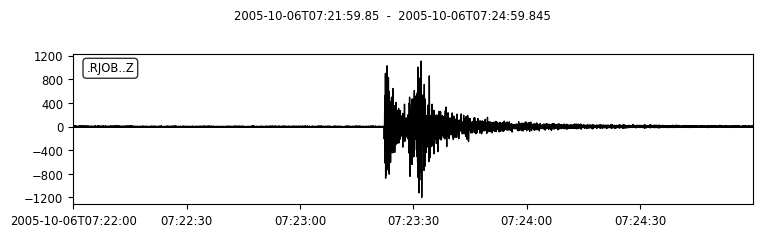

In [56]:
seismogram_1 = st.plot()

## Visualización del sismograma

In [60]:
single_channel = read('https://examples.obspy.org/COP.BHZ.DK.2009.050') 

In [61]:
print(single_channel)

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


In [64]:
three_channels = read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
three_channels += read('https://examples.obspy.org/COP.BHN.DK.2009.050')
three_channels += read('https://examples.obspy.org/COP.BHE.DK.2009.050') 

# Stream con tres trazas

In [65]:
print(three_channels)

3 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
DK.COP..BHN | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples


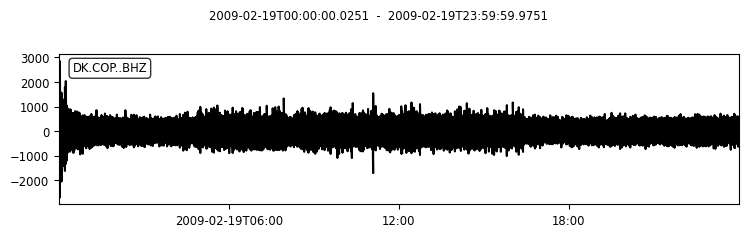

In [67]:
singlechanel_seis = single_channel.plot()

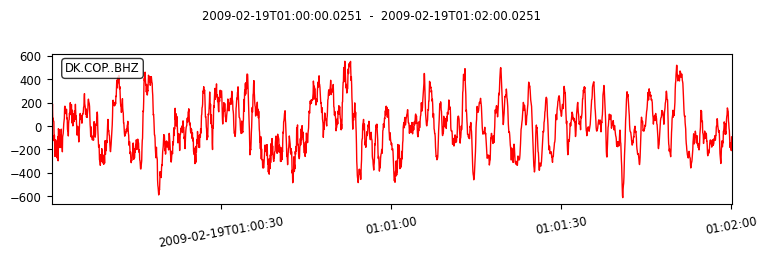

In [69]:
dt = single_channel[0].stats.starttime
singlechanel_seis_crop = single_channel.plot(color='red', tick_rotation=10, tick_format='%I:%M %p',
                                             starttime=dt+60*60, endtime=dt+60*60+120)

In [70]:
single_channel.plot(outfile='single_channel.png') # Guarda la imagen en el directorio actual

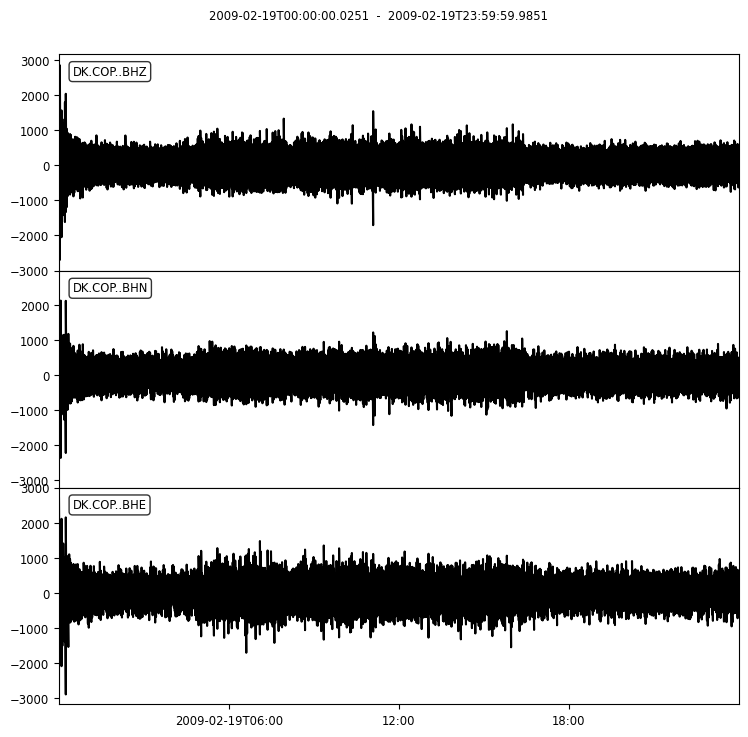

In [71]:
threechannels_seis = three_channels.plot()

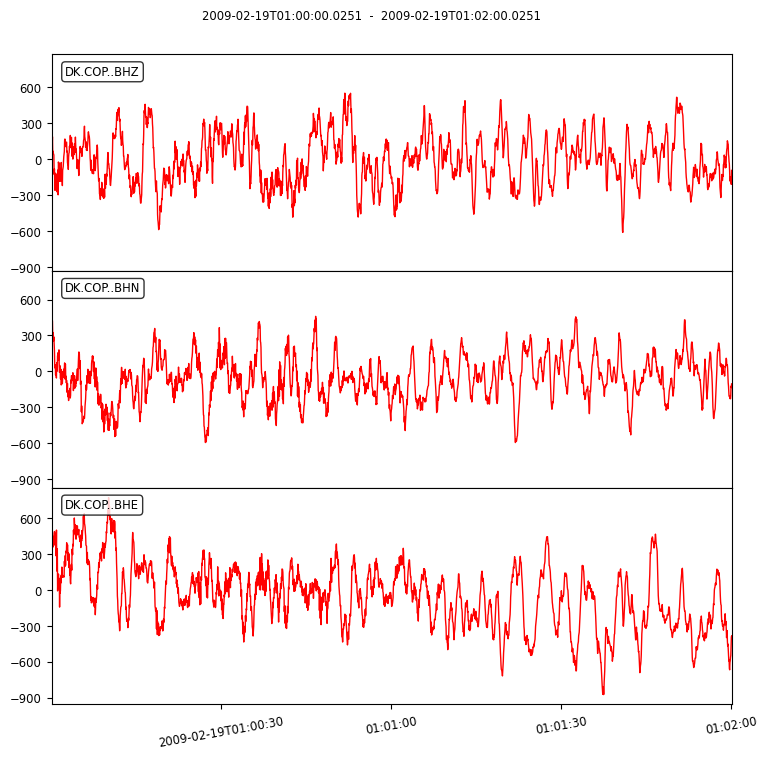

In [72]:
threechannels_seis_crop = three_channels.plot(color='red', tick_rotation=10, tick_format='%I:%M %p',
                                             starttime=dt+60*60, endtime=dt+60*60+120)

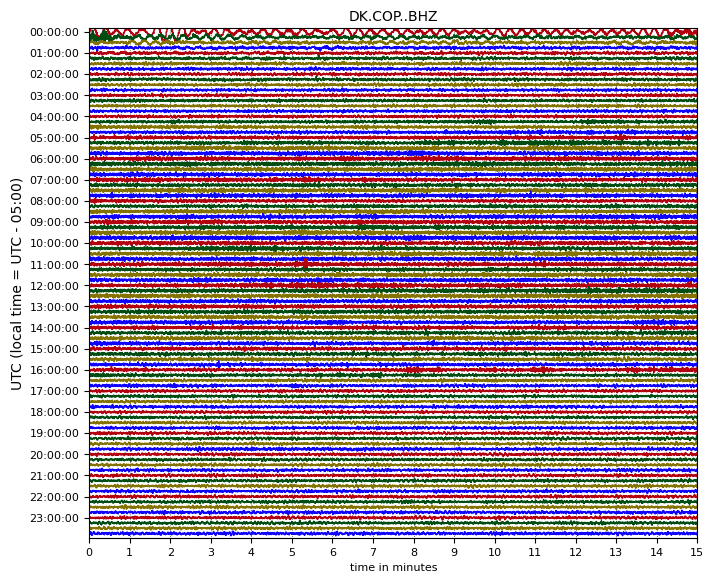

In [74]:
dayplot_single = single_channel.plot(type='dayplot')

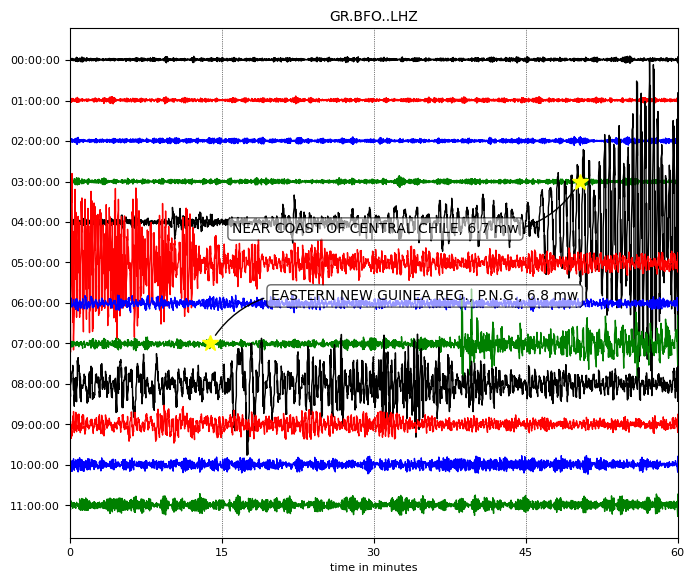

In [75]:
from obspy import read
st = read("https://examples.obspy.org/GR.BFO..LHZ.2012.108")
st.filter("lowpass", freq=0.1, corners=2)
event_plot = st.plot(type="dayplot", interval=60, right_vertical_labels=False,
                vertical_scaling_range=5e3, one_tick_per_line=True,
                color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
                events={'min_magnitude': 6.5})

In [76]:
import matplotlib.pyplot as plt

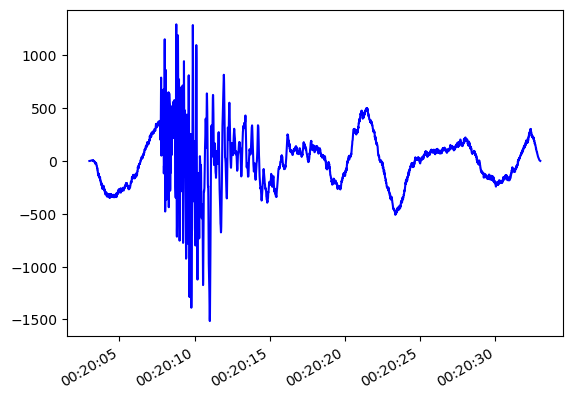

In [77]:
st = read()
tr = st[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()